In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 18.1MB/s 
     |████████████████████████████████| 194kB 55.3MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 1.2MB 47.2MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
!pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.2.5)


# Using Image_Data_Loaders (Pre_trained Model) & cnn_learner to identify whether its a dog image or not
Here we used URLs.PETS dataset for classifcation

We have used Image Data loader class for Image classification.Specify path,validation set i.e. valid_pct, random seed, function to called to specify label,transformation "tfms" applied to each image to resize them to 224-pixel size which is standard size to get better results

In [4]:
# import all functions and libraries from fastai, specify path of image dataset.
from fastai.vision.all import *
path=untar_data(URLs.PETS)/'images'
#define a function is_dog that classifies the images based on filename rule provided i.e. if the first charater of filename is in uppercase, it is a dog
#otherwise it is not a dog
def is_dog (x): return x[0].islower()
#
idl=ImageDataLoaders.from_name_func(path,get_image_files(path),valid_pct=0.2, seed=42, label_func=is_dog,item_tfms=Resize(224))

learn=cnn_learner(idl,resnet34, metrics=error_rate)
learn.fine_tune(1)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.129050,0.026457,0.006089,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.059792,0.024068,0.004736,00:53


We used cnn learner which used resnet 34 architecture in NN. learn.fine_tune() is to fit the pretrained model to targeted dataset to have better accurate prediction

We can upload the image to check whether it is a dog or not using Widgets.


In [5]:
img_f=get_image_files(path/'images')

images=img_f[:5]
img= PILImage.show


In [6]:
import ipywidgets as widgets
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [8]:
img=PILImage.create(upload.data[0])
is_dog,_,probs=learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it is a dog: {probs[1].item():.4f}")

Is this a dog?: True.
Probability it is a dog: 1.0000


#Using unet_learner for Segmentation

Image Clasification is not just to classify images based on labels. We can use it even to segment image by recognizing content of each pixel.


In [9]:
path=untar_data(URLs.CAMVID_TINY)
fname=get_image_files(path/'images')
def data_label_func(x): return path/'labels'/f'{x.stem}_P{x.suffix}'
sdl=SegmentationDataLoaders.from_label_func(path, fname ,data_label_func,
                                            codes=np.loadtxt(path/'codes.txt',dtype=str),bs=8)
learn=unet_learner(sdl,resnet34)
learn.fine_tune(6)


epoch,train_loss,valid_loss,time
0,3.157728,2.109363,00:01


epoch,train_loss,valid_loss,time
0,1.750246,1.608595,00:01
1,1.663046,1.410289,00:01
2,1.485482,1.045843,00:01
3,1.320101,0.939910,00:01
4,1.184618,0.802742,00:01
5,1.078789,0.788167,00:01


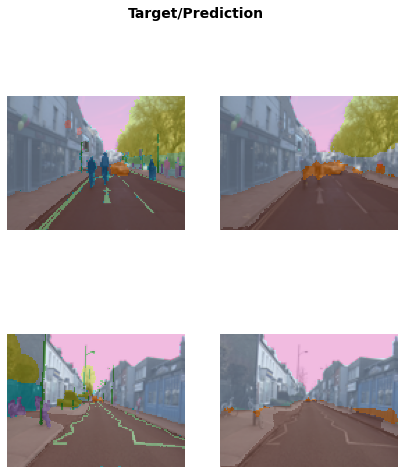

In [10]:
learn.show_results(max_n=8, figsize=(7,8))

#Using TextDataLoaders to train a model for Text_Classification
We use TextDataLoader class to classify sentiments of a movie review (postive or negative)


In [12]:
from fastai.text.all import *
tdl=TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn=text_classifier_learner(tdl,AWD_LSTM, drop_mult=0.5,metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.467614,0.391983,0.826080,03:52


epoch,train_loss,valid_loss,accuracy,time
0,0.361373,0.285979,0.879280,08:02


epoch,train_loss,valid_loss,accuracy,time
0,0.361373,0.285979,0.879280,08:02
1,0.304558,0.246970,0.900480,08:04
2,0.256855,0.225290,0.909080,08:05
3,0.228326,0.219525,0.911400,08:05


In [13]:
learn.predict(" movie was awful ")

('neg', tensor(0), tensor([0.8021, 0.1979]))

#Using tabular_learner for decision tree

Here we code to predict whether a person is high income earner or low income earner based on information available in other columns of tabular data (information about his socioeconomic background)

In [14]:
from fastai.tabular.all import *
path=untar_data(URLs.ADULT_SAMPLE)

tadl=TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
            cat_names=['workclass','education','marital-status','occupation','relationship','race'], cont_names =['age','fnlwgt','education-num'],
            procs=[Categorify,FillMissing, Normalize])
learn=tabular_learner(tadl, metrics=accuracy)


Since in this case there is no pretrained model for tabular data, so we will use fit_one_cycle instead of fine.tune 

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.374512,0.353373,0.838145,00:05
1,0.357779,0.348567,0.840295,00:05
2,0.361112,0.343180,0.846284,00:05
3,0.337986,0.341431,0.845977,00:05


#Using collab_learner for recommendation systems
Here we try to train a model that will predict movies based on people preferences, viewing habbits, liking using Movie_lens_Dataset. This model predicts movie ratings based on scale of 0.5 to 5.

In [16]:
from fastai.collab import *
path=untar_data(URLs.ML_SAMPLE)
cdl=CollabDataLoaders.from_csv(path/'ratings.csv')
#since we are using continuous number for our target , we need to specify fastai what our range our target variable has, i.e. 0.5 to 5.5
learn=collab_learner(cdl,y_range=(0.5,5.5))
learn.fine_tune(10)


epoch,train_loss,valid_loss,time
0,1.526551,1.382408,00:00


epoch,train_loss,valid_loss,time
0,1.362401,1.322626,00:00
1,1.262115,1.139219,00:00
2,1.021196,0.845970,00:00
3,0.802066,0.714493,00:00
4,0.696305,0.683324,00:00
5,0.647252,0.675445,00:00
6,0.635689,0.670894,00:00
7,0.629779,0.669160,00:00
8,0.612132,0.668226,00:00
9,0.615967,0.668060,00:00


In [17]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,36.0,96.0,4.5,4.071285
1,28.0,72.0,2.5,2.929779
2,100.0,5.0,2.0,3.597681
3,68.0,61.0,5.0,4.248983
4,65.0,69.0,5.0,4.179491
5,36.0,31.0,2.0,4.390338
6,24.0,54.0,5.0,3.671946
7,10.0,35.0,5.0,3.795477
8,100.0,84.0,3.0,3.910674
